In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

## Problem 2: 

In [3]:
def simulate_transmission(N, M, Psick, Pinfect):
    # Set up a classroom of healthy & unsuspecting students
    classroom = np.zeros((M, N))

    # Choose a number of sick students for the first day based on the input Psick probability
    for i in range(M):
        if rnd.random() < Psick:
            classroom[0, i] = 1

    # Grab the previous day for use in determining if a student was sick the day before
    for day in range(1, M):
        previous_day = classroom[day - 1] 

        # Go through and check the row for if any student was sick - for every student who was sick, determine whether either of their neighbors became sick
        for i in range(N):
            if previous_day[i] == 1:
                if i > 0 and previous_day[i - 1] == 0 and np.random.random() < Pinfect:
                    classroom[day, i - 1] = 1
                if i < N - 1 and previous_day[i + 1] == 0 and np.random.random() < Pinfect:
                    classroom[day, i + 1] = 1
    
    return classroom

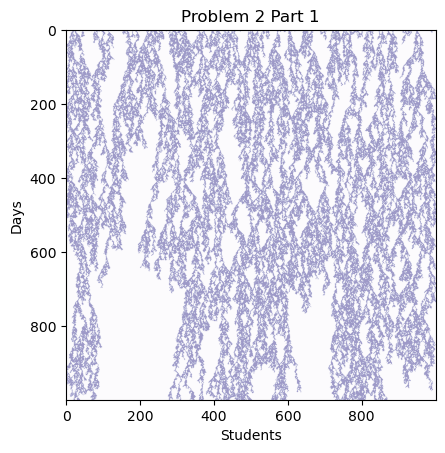

In [7]:
# Initial recommended values
M = 1000
N = 1000
Psick = 0.15

# 0.647 seems to be the Pinfect value which stays most consistent over a high number of trials - generally it fluctuates around ~20% throughout the simulation
Pinfect = 0.647

result = simulate_transmission(M, N, Psick, Pinfect)

plt.imshow(result, cmap='Purples')
plt.xlabel('Students')
plt.ylabel('Days')
plt.title('Problem 2 Part 1')
plt.show()

## Extra Credit:

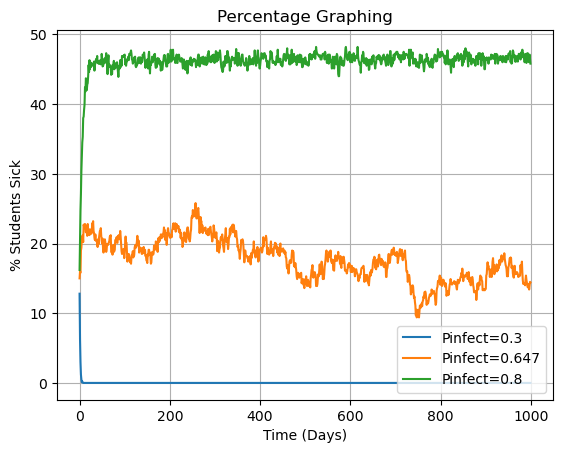

In [8]:
# Runs the simulation for three values - low, high, and theoretically balanced
for i in [0.3, 0.647, 0.8]:

    # Run the simulation with the specified Pinfect
    result = simulate_transmission(1000, 1000, 0.15, i)

    # Calculate the number of sick people at each point
    percentage_sick = np.sum(result, axis=1) / 1000 * 100
    
    # Plot the curve of the percentages
    plt.plot(range(M), percentage_sick, label=f'Pinfect={i}')
    
# Make the graph pretty :)
plt.xlabel('Time (Days)')
plt.ylabel('% Students Sick')
plt.title('Percentage Graphing')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()